# WeatherPy
----

### Analysis Report

*The most coldest cities are located closer to the North Pole, and as expected temperature goes up closer to the equator. And the most warmer cities are located in Tropical Climate Zone.

*There is no strong relationship between latitude and humidity. However, most of the cities have a high level of himudity(between 80-100%).

*Starting from equator and closer to North Pole the quantity of windy cities is rising. And cities with the most strongest winds are located in Polar and Subpolar Climate Zones. 

---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
import pprint as pp

# Import API key
import api_keys
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


615

In [3]:
#Creating initial dataframe and adding additional columns
dataframe = pd.DataFrame({"City": cities})
dataframe["Cloudiness"] = ""
dataframe["Country"] = ""
dataframe["Date"] = ""
dataframe["Humidity"] = ""
dataframe["Lat"] = ""
dataframe["Lng"] = ""
dataframe["Max Temp"] = ""
dataframe["Wind Speed"] = ""

In [4]:
city_count=0

pp.pprint(f"Beginning Process...")     
pp.pprint(f"-----------------------------------------")

# Creating a loop to find infomation about each city in the list.
# Creating url with parametrs 
# Requesting information in JSON format

for index, row in dataframe.iterrows():
    city = row["City"]
    url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = f"{url}appid={api_key}&q={city}&units=imperial"
    citydata = requests.get(query_url).json()
    
    pp.pprint(f"Processing request for city # {city_count + 1}: {dataframe.loc[index]['City']}")
    city_count += 1
    
# Retrieving data from each JSON request and inserting them into the dataframe 
# Debbuging 
    try:
        row['Cloudiness'] = citydata['clouds']['all'] # cloudliness
        row['Country'] =citydata["sys"]["country"]
        row['Date'] = citydata['dt'] # date results retrieved 
        row['Humidity'] = citydata['main']['humidity'] # humidity
        row['Lat'] = citydata['coord']['lat'] # latitude
        row['Lng'] = citydata['coord']['lon'] # latitude
        row['Max Temp'] = citydata['main']['temp'] # Farhenheit temperature
        row['Wind Speed'] = citydata['wind']['speed'] # wind speed 
        
    except KeyError:
        pp.pprint(f"City not found. Skipping...")
#Pausing data requests if necessary   
        if (city_count % 60) == 0:
            pp.pprint(f"-----------------------------------------")
            pp.pprint('Pausing API requests for 30 seconds.')
            time.sleep(15)

pp.pprint("Process completed. ")


'Beginning Process...'
'-----------------------------------------'
'Processing request for city # 1: lebu'
'Processing request for city # 2: nome'
'Processing request for city # 3: yumen'
'Processing request for city # 4: longyearbyen'
'Processing request for city # 5: belaya gora'
'Processing request for city # 6: hithadhoo'
'Processing request for city # 7: vaini'
'Processing request for city # 8: bataipora'
'Processing request for city # 9: naberera'
'Processing request for city # 10: thinadhoo'
'Processing request for city # 11: ushuaia'
'Processing request for city # 12: gerash'
'Processing request for city # 13: mataura'
'Processing request for city # 14: tiksi'
'Processing request for city # 15: cuamba'
'Processing request for city # 16: xiaoweizhai'
'Processing request for city # 17: ostrovnoy'
'Processing request for city # 18: cayenne'
'Processing request for city # 19: punta arenas'
'Processing request for city # 20: amderma'
'City not found. Skipping...'
'Processing request

'Processing request for city # 167: kaeo'
'Processing request for city # 168: kudahuvadhoo'
'Processing request for city # 169: emerald'
'Processing request for city # 170: bridgetown'
'Processing request for city # 171: rairangpur'
'Processing request for city # 172: barrow'
'Processing request for city # 173: klaksvik'
'Processing request for city # 174: provideniya'
'Processing request for city # 175: qaanaaq'
'Processing request for city # 176: arraial do cabo'
'Processing request for city # 177: christiana'
'Processing request for city # 178: vysokogornyy'
'Processing request for city # 179: rungata'
'City not found. Skipping...'
'Processing request for city # 180: pozo colorado'
'Processing request for city # 181: nizwa'
'Processing request for city # 182: meyungs'
'City not found. Skipping...'
'Processing request for city # 183: korla'
'City not found. Skipping...'
'Processing request for city # 184: hay river'
'Processing request for city # 185: nabire'
'Processing request for 

'Processing request for city # 331: cap malheureux'
'Processing request for city # 332: ulcinj'
'Processing request for city # 333: dali'
'Processing request for city # 334: kahului'
'Processing request for city # 335: lawrenceburg'
'Processing request for city # 336: biltine'
'Processing request for city # 337: praia da vitoria'
'Processing request for city # 338: martapura'
'Processing request for city # 339: fortuna'
'Processing request for city # 340: richards bay'
'Processing request for city # 341: san policarpo'
'Processing request for city # 342: altay'
'Processing request for city # 343: evensk'
'Processing request for city # 344: beira'
'Processing request for city # 345: mahibadhoo'
'Processing request for city # 346: tumannyy'
'City not found. Skipping...'
'Processing request for city # 347: fukue'
'Processing request for city # 348: hofn'
'Processing request for city # 349: qiyang'
'Processing request for city # 350: asau'
'City not found. Skipping...'
'Processing request 

'Processing request for city # 497: kalmunai'
'Processing request for city # 498: nanga eboko'
'Processing request for city # 499: simpsonville'
'Processing request for city # 500: salalah'
'Processing request for city # 501: olinda'
'Processing request for city # 502: sumbawa'
'City not found. Skipping...'
'Processing request for city # 503: el real de santa maria'
'Processing request for city # 504: nouadhibou'
'Processing request for city # 505: pimentel'
'Processing request for city # 506: chagda'
'City not found. Skipping...'
'Processing request for city # 507: erzin'
'Processing request for city # 508: whitehorse'
'Processing request for city # 509: hauterive'
'Processing request for city # 510: stornoway'
'City not found. Skipping...'
'Processing request for city # 511: sayyan'
'Processing request for city # 512: arlit'
'Processing request for city # 513: barabinsk'
'Processing request for city # 514: smithers'
'Processing request for city # 515: casa grande'
'Processing request

In [5]:
#convertingdate format
#Displaying initial DataFrame
dataframe["Date"] = pd.to_datetime(dataframe["Date"], unit="s")
dataframe.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lebu,0,ET,2018-11-30 18:29:40,62,8.96,38.73,52.39,6.24
1,nome,90,US,2018-11-30 18:15:00,73,30.04,-94.42,77.29,11.41
2,yumen,0,CN,2018-11-30 18:29:41,70,40.29,97.04,23.27,3.89
3,longyearbyen,90,NO,2018-11-30 17:50:00,79,78.22,15.63,26.6,24.16
4,belaya gora,56,RU,2018-11-30 18:21:32,77,68.54,146.19,-11.93,7.29
5,hithadhoo,92,MV,2018-11-30 18:29:42,100,-0.6,73.08,83.57,7.85
6,vaini,12,IN,2018-11-30 18:29:42,64,15.34,74.49,69.44,4.5
7,bataipora,68,BR,2018-11-30 18:29:42,89,-22.3,-53.27,80.1,4.72
8,naberera,44,TZ,2018-11-30 18:29:43,59,-4.2,36.93,74.89,12.28
9,thinadhoo,80,MV,2018-11-30 18:29:43,100,0.53,72.93,83.12,9.37


In [6]:
#Removing rows with empty data 
#Displaying DataFrame 
for column in dataframe:
    dataframe.replace('', np.nan, inplace=True)
    dataframe.dropna(subset=["Country"], inplace=True)
dataframe.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lebu,0.0,ET,2018-11-30 18:29:40,62.0,8.96,38.73,52.39,6.24
1,nome,90.0,US,2018-11-30 18:15:00,73.0,30.04,-94.42,77.29,11.41
2,yumen,0.0,CN,2018-11-30 18:29:41,70.0,40.29,97.04,23.27,3.89
3,longyearbyen,90.0,NO,2018-11-30 17:50:00,79.0,78.22,15.63,26.60,24.16
4,belaya gora,56.0,RU,2018-11-30 18:21:32,77.0,68.54,146.19,-11.93,7.29
5,hithadhoo,92.0,MV,2018-11-30 18:29:42,100.0,-0.60,73.08,83.57,7.85
6,vaini,12.0,IN,2018-11-30 18:29:42,64.0,15.34,74.49,69.44,4.50
7,bataipora,68.0,BR,2018-11-30 18:29:42,89.0,-22.30,-53.27,80.10,4.72
8,naberera,44.0,TZ,2018-11-30 18:29:43,59.0,-4.20,36.93,74.89,12.28
9,thinadhoo,80.0,MV,2018-11-30 18:29:43,100.0,0.53,72.93,83.12,9.37


### Plotting the Data

#### Latitude vs. Temperature Plot

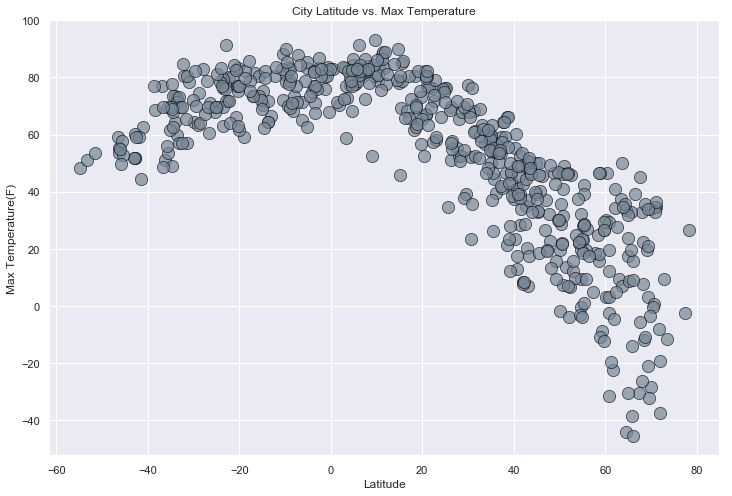

In [14]:
#Creating a Scatterplot using Seaborn
plt.figure(figsize=(12,8))
sns.scatterplot(x="Lat", y="Max Temp", 
            data=dataframe, alpha = 0.7, edgecolor = "black",  
            linewidths = None, facecolors = 'lightslategrey', s=150)
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.savefig('images/City Latitude vs. Max Temperature.png')
plt.show()


#### Latitude vs. Humidity Plot

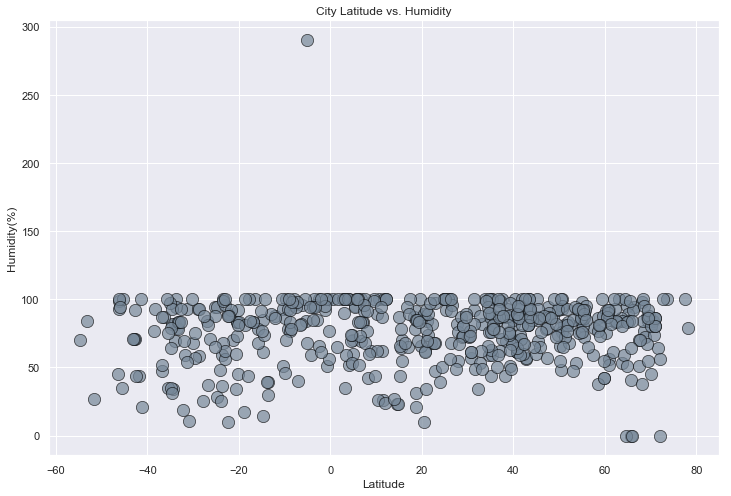

In [15]:
#Creating a  Scatterplot using Seaborn
plt.figure(figsize=(12,8))
sns.scatterplot(x="Lat", y="Humidity", 
            data=dataframe, alpha = 0.7, edgecolor = "black",  
            linewidths = None, facecolors = 'lightslategrey', s=150)
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.savefig('images/City Latitude vs. Humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

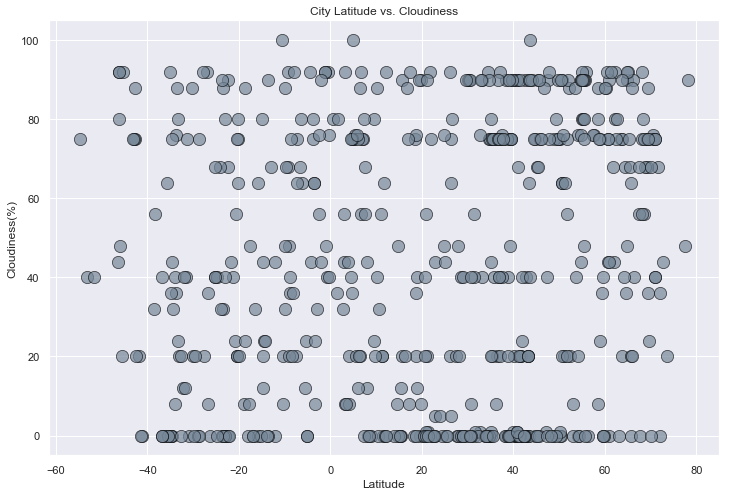

In [16]:
#Creating a  Scatterplot using Seaborn
plt.figure(figsize=(12,8))
sns.scatterplot(x="Lat", y="Cloudiness", data=dataframe, alpha = 0.7, edgecolor = "black",  
            linewidths = None, facecolors = 'lightslategrey', s=150)
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.savefig('images/City Latitude vs. Cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

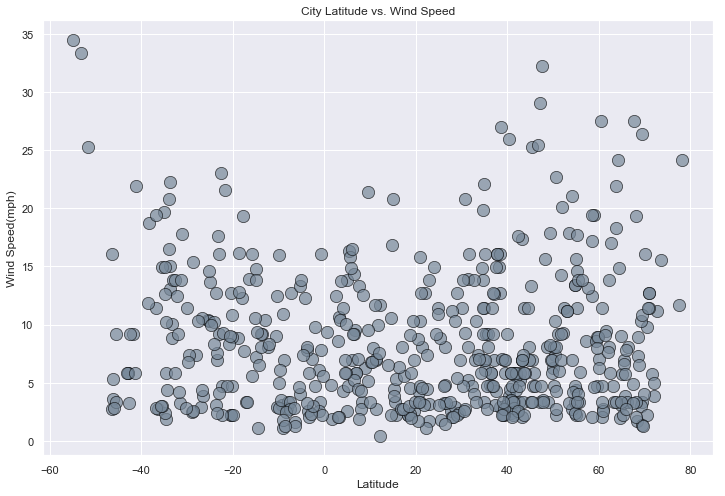

In [17]:
#Creating a  Scatterplot using Seaborn
plt.figure(figsize=(12,8))
sns.scatterplot(x="Lat", y="Wind Speed", data=dataframe, alpha = 0.7, edgecolor = "black",  
            linewidths = None, facecolors = 'lightslategrey', s=150)
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.savefig('images/City Latitude vs. Wind Speed.png')
plt.show()
